Image shape: Rows=576, Columns=720, Channels=3


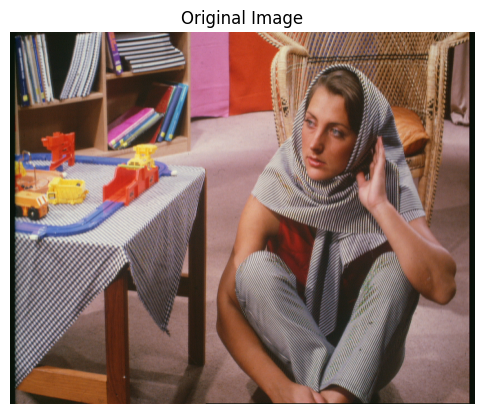

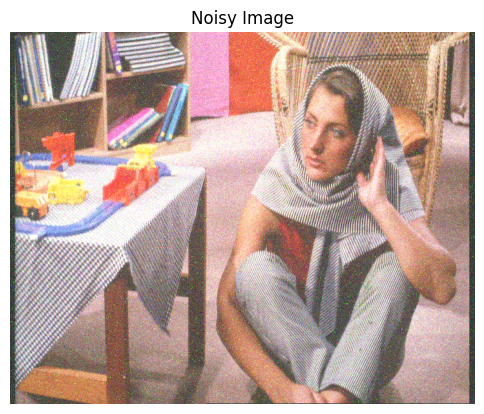

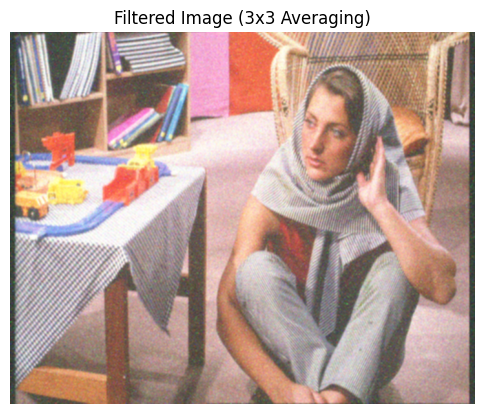

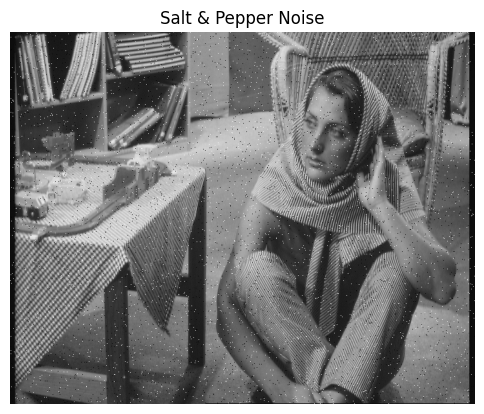

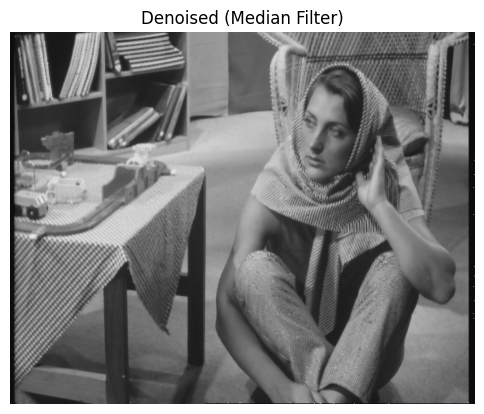

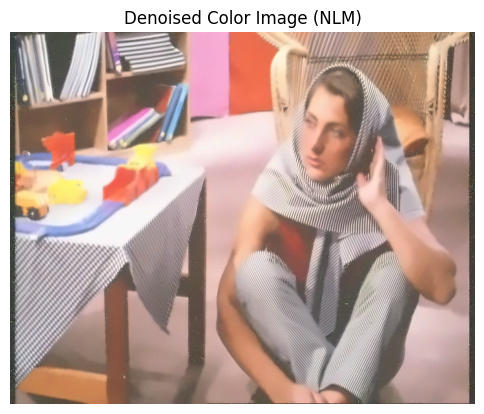

In [1]:
# Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Jupyter magic command
%matplotlib inline

# Helper function to show images
def show_img(img, title='Image', cmap_type=None):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap_type if cmap_type else 'gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load Image - use raw string or double backslashes
img_1 = cv2.imread("C:\\Users\\HP\\Downloads\\Standard Images\\barbara.bmp")

if img_1 is None:
    raise FileNotFoundError("Image not found. Check the path.")

# Convert BGR to RGB
img_rgb = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

# Shape Info
rows, cols, channels = img_rgb.shape
print(f"Image shape: Rows={rows}, Columns={cols}, Channels={channels}")

# Show original image
show_img(img_1, "Original Image")

# Add Gaussian Noise
noise = np.random.normal(50, 20, img_1.shape).astype(np.uint8)
noisy_image = cv2.add(img_1, noise)
show_img(noisy_image, "Noisy Image")

# Apply 3x3 Averaging Filter
kernel = np.ones((3, 3), np.float32) / 9
filtered_img = cv2.filter2D(noisy_image, -1, kernel)
show_img(filtered_img, "Filtered Image (3x3 Averaging)")

# Convert to Grayscale for salt & pepper noise
gray_img = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
sp_noise_img = gray_img.copy()

# Add Salt & Pepper Noise
for _ in range(random.randint(3000, 10000)):
    i = random.randint(0, rows - 1)
    j = random.randint(0, cols - 1)
    sp_noise_img[i][j] = random.choice([0, 255])

show_img(sp_noise_img, "Salt & Pepper Noise", cmap_type='gray')

# Median Filtering (3x3)
denoised = sp_noise_img.copy()
for i in range(rows - 3):
    for j in range(cols - 3):
        patch = sp_noise_img[i:i+3, j:j+3].reshape(-1)
        patch.sort()
        denoised[i, j] = patch[4]

show_img(denoised, "Denoised (Median Filter)", cmap_type='gray')

# Non-Local Means Denoising (Color)
denoised_colored = cv2.fastNlMeansDenoisingColored(noisy_image, None, 10, 10, 7, 21)
show_img(denoised_colored, "Denoised Color Image (NLM)")